In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from Task1 import final_data,X,y,x_train, x_test, y_train, y_test 

In [42]:
def plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test, name=None):
    plt.plot(fpr_train, tpr_train, linewidth=2,c='r',label='train')
    plt.plot(fpr_test, tpr_test, linewidth=2,c='b',label='test')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend(loc='best')
    plt.show()

## XGBoost

In [6]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=6,
 min_child_weight=1,
 gamma=0,#惩罚项
 subsample=0.8,#随机选80%的样本
 colsample_bytree=0.8,#随机选特征
#  objective= 'binary:logistic',#lost funation ： logistic
 nthread=3,#均衡样本
 scale_pos_weight=1,
 seed=2018)

In [41]:
from xgboost import XGBClassifier 
xgb = xgb1.fit(x_train,y_train)
xgb.score(x_test,y_test)

0.8656995788488535

准确率:0.8657,精确率:0.9024,召回率:0.8183,f1-score:0.8583,auc:0.8654


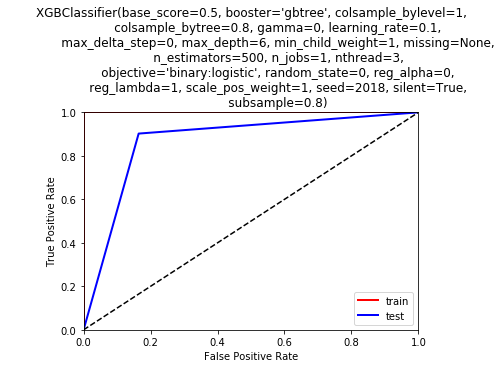

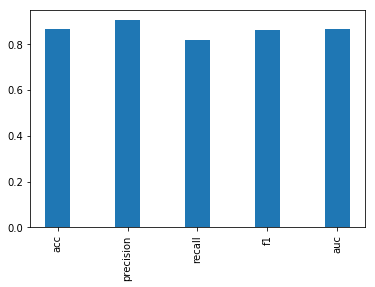

In [47]:
from sklearn import metrics
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,xgb)

predictors = ['acc','precision','recall','f1','auc']
xgb_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), xgb_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## RandomForestClassifier



In [10]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=500, min_samples_split=4, min_samples_leaf=2,bootstrap=True, max_depth=4, max_features=6)
RF.fit(x_train, y_train)
RF.score(x_test, y_test)

0.7875526438933084

准确率:0.7876,精确率:0.7940,召回率:0.7731,f1-score:0.7834,auc:0.7875


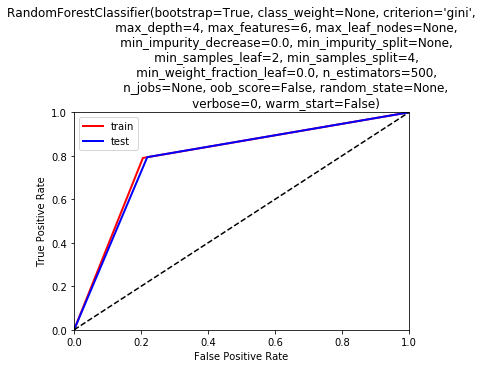

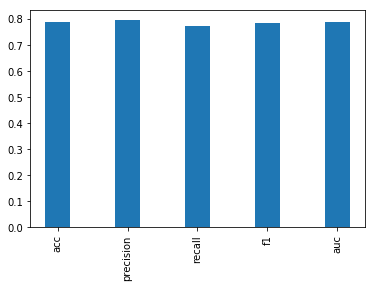

In [53]:
from sklearn import metrics
y_train_pred = RF.predict(x_train)
y_test_pred = RF.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,RF)


RF_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), RF_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(x_train,y_train)
lr.score(x_test,y_test)

C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7262517547964437

准确率:0.7263,精确率:0.7540,召回率:0.6667,f1-score:0.7076,auc:0.7259


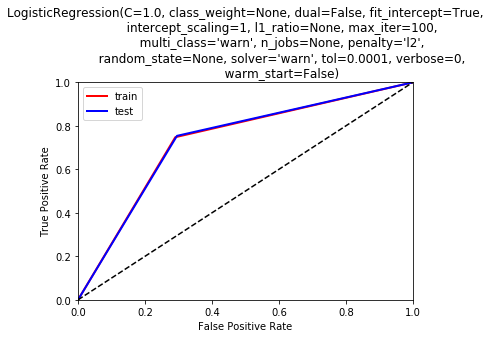

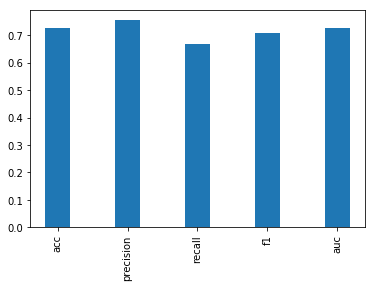

In [52]:
from sklearn import metrics

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,lr)


lr_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), lr_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## SVM

In [14]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',gamma='auto',cache_size=5000).fit(x_train,y_train)
svm.score(x_test,y_test)

0.7622835751052878

准确率:0.7623,精确率:0.7608,召回率:0.7608,f1-score:0.7608,auc:0.7623


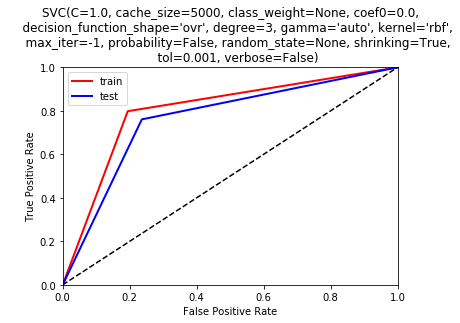

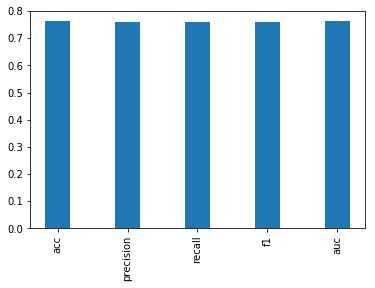

In [50]:
from sklearn import metrics
y_train_pred = svm.predict(x_train)
y_test_pred = svm.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,svm)

svm_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), svm_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## DecisionTree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(x_train,y_train)
dtc.score(x_test,y_test)

0.7674309780065512

准确率:0.7674,精确率:0.7580,召回率:0.7815,f1-score:0.7696,auc:0.7675


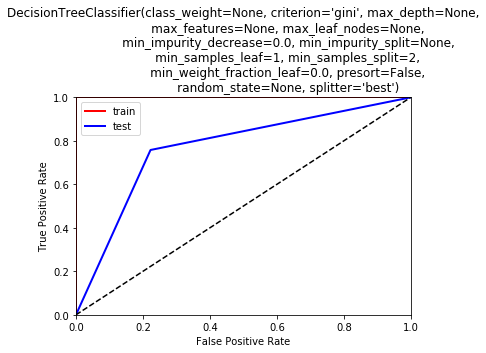

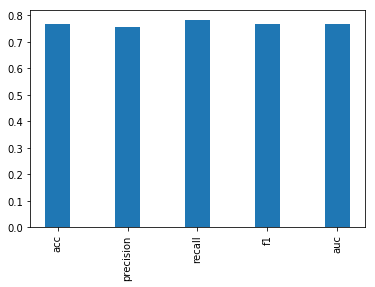

In [54]:
from sklearn import metrics

y_train_pred = dtc.predict(x_train)
y_test_pred = dtc.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,dtc)

dtc_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), dtc_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [55]:
s = pd.DataFrame( columns=predictors, index=['xgb', 'rf', 'svm', 'lr', 'dtc'])

In [56]:
for i in range(5):
    s.iloc[0][i] = xgb_scores[i]
    s.iloc[1][i] = rf_scores[i]
    s.iloc[2][i] = svm_scores[i]
    s.iloc[3][i] = lr_scores[i]
    s.iloc[4][i] = dtc_scores[i]

In [57]:
s.head()

,acc,precision,recall,f1,auc
xgb,0.8657,0.902388,0.818267,0.858272,0.865413
rf,0.787553,0.794004,0.77307,0.783397,0.787465
svm,0.762284,0.760829,0.760829,0.760829,0.762275
lr,0.726252,0.753994,0.666667,0.707646,0.725891
dtc,0.767431,0.757991,0.781544,0.769587,0.767516
